# Analysing the Restaurants:
Opening a restaurant in a city like Bengaluru will never be easier as it used to be in the past because of the several obvious reasons.
Bengaluru, being an IT capital of India, has more than 12,000 restaurants with restaurants serving dishes from all over the world. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

In order to help people/our client who want to open new restaurant or they would want to bring a change in their existing restaurant to compete in the market, we can analyse several factors.

We'll perform analysis using the data, by studying the factors such as:

• Location and types of the restaurant  
• Approx Price of food  
• The needs of people who are striving to get the best cuisine in the city  
• Services provided by them  
• Reviews and Ratings

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!ls -a /root/
!rm /root/.kaggle
!mkdir ~/.kaggle
!cp /content/drive/"My Drive"/Codes/kaggle.json /root/.kaggle

!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

!unzip /content/zomato-bangalore-restaurants.zip

rm: cannot remove '/root/.kaggle': No such file or directory
100% 89.0M/89.0M [00:00<00:00, 82.3MB/s]
100% 89.0M/89.0M [00:00<00:00, 102MB/s] 
Archive:  /content/zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


In [0]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/zomato.csv")
df.head()

url  ... listed_in(city)
0  https://www.zomato.com/bangalore/jalsa-banasha...  ...    Banashankari
1  https://www.zomato.com/bangalore/spice-elephan...  ...    Banashankari
2  https://www.zomato.com/SanchurroBangalore?cont...  ...    Banashankari
3  https://www.zomato.com/bangalore/addhuri-udupi...  ...    Banashankari
4  https://www.zomato.com/bangalore/grand-village...  ...    Banashankari

[5 rows x 17 columns]

### Preprocessing the Data

We'll see how much of the restaurants entries contain actual information and how much of it us Null. We then remove number of features which we see as redundant information as it won't help in analysis, such as Phone number.

menu item has 39617 blank ('[]') entries.  
df['rate'] has 7775 nulls.  
df['votes'] has no nulls.  
df['cuisines'] has 45 nulls.  


We're yet to find the exact number of restaurants as some of them are repeated in the dataset. Based on name and address we'll find that further.

shape of df: 51717, 17

It's better to remove the redundant features from Dataset:
url, phone, and menu item.

In [0]:
df = df.drop(columns=['url', 'phone', 'menu_item'])
df.head()

address  ... listed_in(city)
0  942, 21st Main Road, 2nd Stage, Banashankari, ...  ...    Banashankari
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  ...    Banashankari
2  1112, Next to KIMS Medical College, 17th Cross...  ...    Banashankari
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  ...    Banashankari
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...  ...    Banashankari

[5 rows x 14 columns]

In [0]:
# converting cost from string to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)
df['approx_cost(for two people)'].dtype

dtype('float64')

(array([3.8105e+04, 9.8410e+03, 2.7140e+03, 6.1200e+02, 3.6600e+02,
        4.0000e+01, 3.4000e+01, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  40.,  636., 1232., 1828., 2424., 3020., 3616., 4212., 4808.,
        5404., 6000.]),
 <a list of 10 Patch objects>)

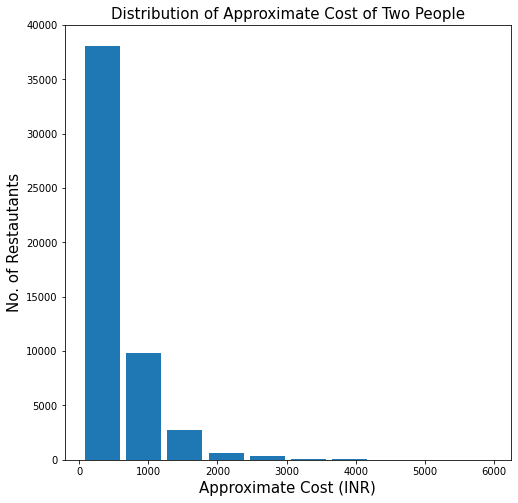

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title(label='Distribution of Approximate Cost of Two People', fontsize=15)
plt.ylabel('No. of Restautants', fontsize=15)
plt.xlabel('Approximate Cost (INR)', fontsize=15)

plt.hist(df['approx_cost(for two people)'], rwidth= 0.85)


The Distribution of the 'Approximate Cost' parameter is right-skewed.
The distribution shows most of the restaurants offer food at rates upto 1000 INR for 2 people.

we'll convert the variables from yes/no to 0/1.

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['book_table'] = le.fit_transform(df['book_table'])

df['online_order'] = le.fit_transform(df['online_order'])
df.head()


address  ... listed_in(city)
0  942, 21st Main Road, 2nd Stage, Banashankari, ...  ...    Banashankari
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  ...    Banashankari
2  1112, Next to KIMS Medical College, 17th Cross...  ...    Banashankari
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  ...    Banashankari
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...  ...    Banashankari

[5 rows x 14 columns]

We will try to answer the following questions using our data:

How much is the average approx cost for two overall in bangalore?

In which area, there are highest number of restaurants? Location wise restaurants density..

Location wise approx cost for 2..

Location wise restaurants which have both online order and table booking available..

we'll calculate mean of the approx cost for 2.

first converting the column values from str to float..

There are 346 missing values in this column. We can impute the missing values as follows.

In [0]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['approx_cost(for two people)'] = imp.fit_transform(df[['approx_cost(for two people)']]).ravel()


In [0]:
df['approx_cost(for two people)'].describe()

count    51717.000000
mean       555.431566
std        437.380224
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64


average approx cost for 2 of overall restaurants in Bnagalore is 500-600 INR.

Number of restaurants location wise, we'll visualize using bar graph.

but for the client's information, we can give the idea of the average cost of 2 people for each category of the restaurants.



We'll visualize the average cost for each category.

In [0]:
category_costs = dict()
iter = 0

for cost in df['approx_cost(for two people)']:
    if df['listed_in(type)'][iter] not in category_costs.keys():
        category_costs[df['listed_in(type)'][iter]] = cost
    else:
        category_costs[df['listed_in(type)'][iter]] += cost
    iter+=1;

#Calculating averages of all
for key, value in category_costs.items():
    category_costs[key] = int(category_costs[key] / df['listed_in(type)'].value_counts()[key])
    

for key, value in category_costs.items():
    print(f'{key}: {value}')


#category_costs = sorted(category_costs.items(), key= lambda x: x[1])
#type(category_costs)

Buffet: 1297
Cafes: 626
Delivery: 465
Desserts: 393
Dine-out: 591
Drinks & nightlife: 1437
Pubs and bars: 1318


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


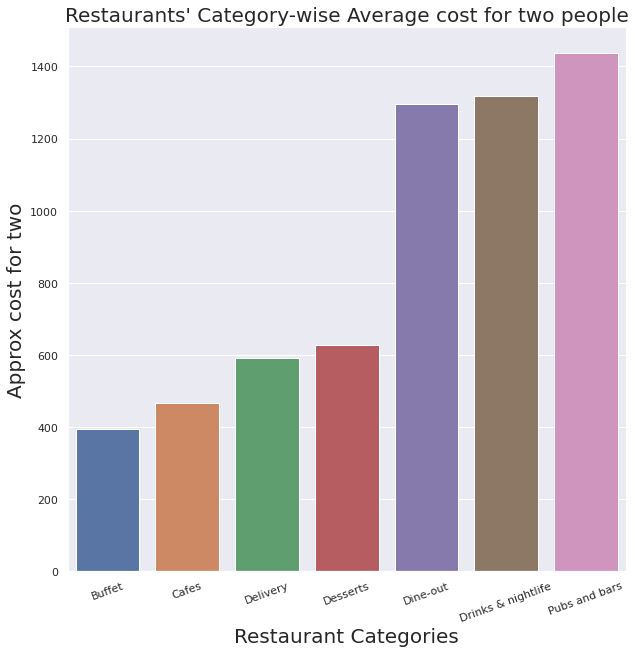

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

rest_cats = category_costs.keys()
rest_cost = category_costs.values()

rest_cats = list(rest_cats)
rest_cost = list(rest_cost)

plt.figure(figsize=(10,10))
plt.xticks(rotation = 20)

sns.barplot(x=sorted(rest_cats), y=sorted(rest_cost))

plt.title(label='Restaurants\' Category-wise Average cost for two people', fontsize=20)
plt.xlabel('Restaurant Categories', fontsize=20)
plt.ylabel('Approx cost for two', fontsize=20)

plt.show()


Although this dataset doesn't have detailed data about food items costs, it may help the client to decide on the 'costing of food items' for their restaurant, that if two people come in there, how much would it cost on an average.

We'll visualize the number of restaurants location wise, using bar graph.

In [0]:
rests_density_df = df.drop_duplicates(subset=("name", "address", "location"))

rests_density_df.shape

(12530, 14)

We can have counts of the number of restaurants location-wise for all the 30 locations listed by Zomato.

In [0]:
location_wise_counts = rests_density_df['listed_in(city)'].value_counts()

After dropping the duplicates, we now have total of around 12k restaurants.
Here we are seeing the location wise restaurants distribution.

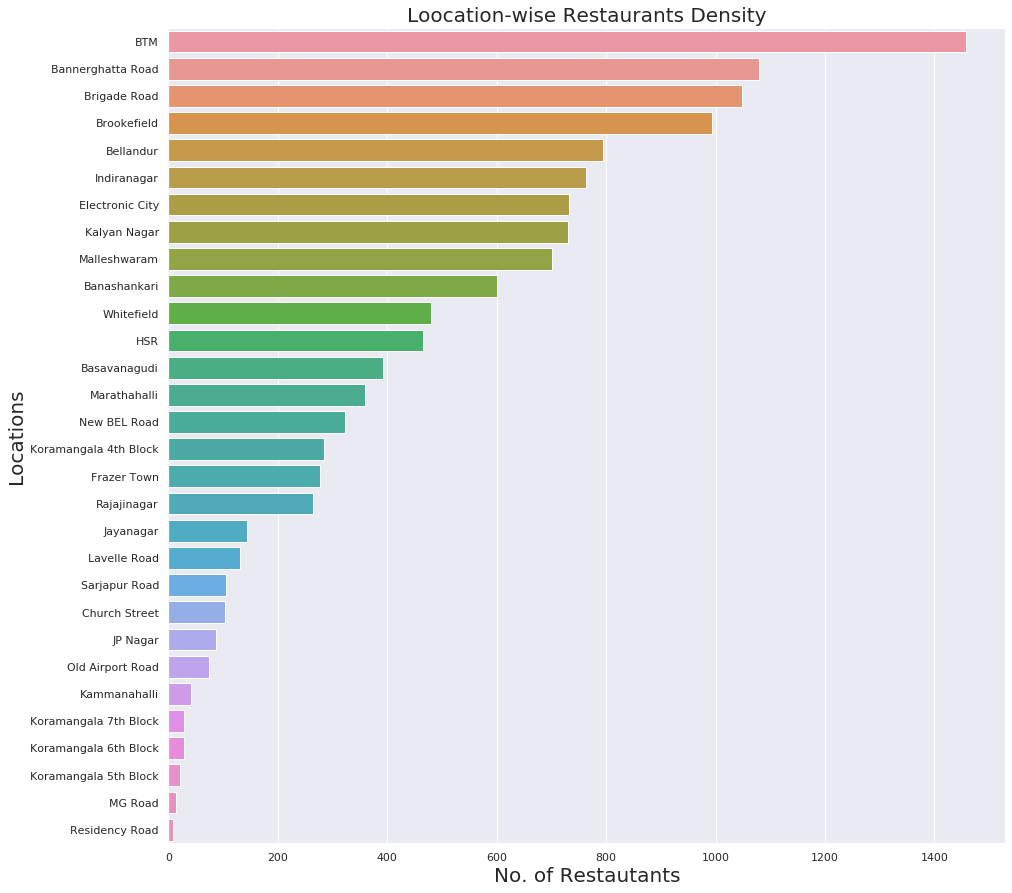

In [0]:

plt.figure(figsize=(15,15))

sns.barplot(x=list(location_wise_counts.values), y=list(location_wise_counts.keys()))

plt.title(label='Loocation-wise Restaurants Density', fontsize=20)
plt.xlabel('No. of Restautants', fontsize=20)
plt.ylabel('Locations', fontsize=20)

plt.show()

The client can now get a brief idea about where can they think of opening new restaurant. They may come to the conclusion by knowing some more information further.

Some more information can be explored regarding the restaurnts like the availability of online order and table booking...

In [0]:
book_table_count = dict()
online_order_count = dict()
table_online_count = dict()
table_online_none_count = dict()

for loc in location_wise_counts.keys():
    book_table_count[loc] = rests_density_df[(rests_density_df['book_table'] == True) & (rests_density_df['online_order'] == False) & (rests_density_df['listed_in(city)'] == loc)].shape[0]
    online_order_count[loc] = rests_density_df[(rests_density_df['online_order'] == True) & (rests_density_df['book_table'] == False) & (rests_density_df['listed_in(city)'] == loc)].shape[0]
    table_online_count[loc] = rests_density_df[(rests_density_df['book_table'] == True) & (rests_density_df['online_order'] == True) & (rests_density_df['listed_in(city)'] == loc)].shape[0]
    table_online_none_count[loc] = rests_density_df[(rests_density_df['book_table'] == False) & (rests_density_df['online_order'] == False) & (rests_density_df['listed_in(city)'] == loc)].shape[0]

In [0]:
rests_density_df['listed_in(city)'].value_counts()

In [0]:
bars1 = list(book_table_count.values())
bars2 = list(online_order_count.values())
bars3 = list(table_online_count.values())
bars4 = list(table_online_none_count.values())

r = list(np.arange(0, 30))
bars = np.add(bars1, bars2).tolist()
bars = np.add(bars, bars3).tolist()

names = list(location_wise_counts.keys())
barWidth = 1


Here we can provide some more insight on the restaurants.  On a particular location, how many restaurants have the Table booking, online order, both facilities, and none of those facilities available.

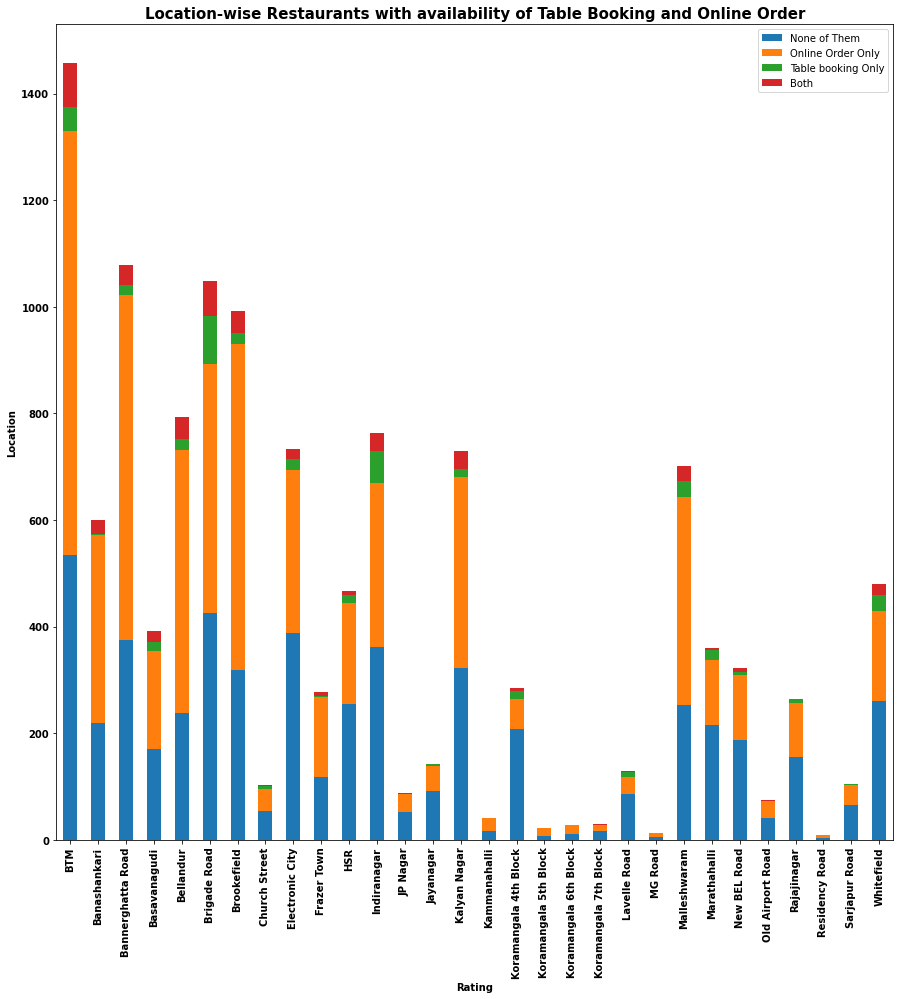

In [0]:

loc_plt=pd.crosstab(rests_density_df['listed_in(city)'],[rests_density_df['book_table'], rests_density_df['online_order']])
loc_plt.plot(kind='bar',stacked=True, figsize=(15,15));
plt.title('Location-wise Restaurants with availability of Table Booking and Online Order',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
legends = ['None of Them', 'Online Order Only', 'Table booking Only', 'Both']
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend(legends)
plt.show()

We see that plenty of the restaurants provide Online ordering facility. While table booking is available at handful of restaurants.  
Most of them do not provide any of these facilities.

###First Time Getting the geo-codes and Creating the CSV File.

We now get the Geographical Coordinates of all the restaurants to display the Locations of the restaurants and a heatmap.

In [0]:
import geocoder

addr_count = 0

geocodes_list = []
address_list = rests_density_df['address'].iloc[:50]

for address in address_list:
    g = geocoder.tomtom(address, key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
#    print('before try')
    if 'ERROR - 404' in str(g):
#        print('under Error')
        location_of_address = rests_density_df.loc[rests_density_df['address'] == address]['listed_in(city)']
        g = geocoder.tomtom(location_of_address.iloc[0], key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
        geocodes_list.append(g.json['raw']['position'])
    else:
        try:
 #           print('in try')
            geocodes_list.append(g.json['raw']['position'])
        except TypeError:
    #        print('in type error')
            #Get the location based on the address
            location_of_address = rests_density_df.loc[rests_density_df['address'] == address]['listed_in(city)']
            g = geocoder.tomtom(location_of_address.iloc[0], key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
            geocodes_list.append(g.json['raw']['position'])
#    addr_count += 1
#    print(addr_count)

df_codes = pd.DataFrame(geocodes_list)

df_codes.to_csv('/content/drive/My Drive/Zomato_Rests_Reviews_Analysis/geocodes.csv', index=False)



###Next Time: first reading the existing codes from file and appending new codes to write them back to file.

In [0]:
!pip install geocoder

import geocoder

from time import sleep


In [0]:


df_codes= pd.read_csv('/content/drive/My Drive/Zomato_Rests_Reviews_Analysis/geocodes.csv', index_col=False)

# to collect the codes from the api
geocodes_list = []
# addresses from our main dataframe to get the codes for
address_list = rests_density_df['address'].iloc[11500:]

#Getting new codes
for address in address_list:
    sleep(0.75)
    g = geocoder.tomtom(address, key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
#    print('before try')

    if 'ERROR - 404' in str(g):
#        print('under Error')
        location_of_address = rests_density_df.loc[rests_density_df['address'] == address]['listed_in(city)']
        g = geocoder.tomtom(location_of_address.iloc[0], key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
#        geocodes_list.append(g.json['raw']['position'])
#    else:
    try:
#           print('in try')
        geocodes_list.append(g.json['raw']['position'])
    except TypeError:
#        print('in type error')
        #Get the location based on the address
        location_of_address = rests_density_df.loc[rests_density_df['address'] == address]['listed_in(city)']
        g = geocoder.tomtom(location_of_address.iloc[0], key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
        geocodes_list.append(g.json['raw']['position'])

#appending the new codes to existing codes
for each_code in geocodes_list:
    code = pd.Series(each_code, index=df_codes.columns)
    df_codes = df_codes.append(code, ignore_index=True)


df_codes.to_csv('/content/drive/My Drive/Zomato_Rests_Reviews_Analysis/geocodes.csv', index=False)





---
###Displaying the markers on  map using folium





In [0]:
#displaying the markers on map
import folium
from IPython.display import display
  
my_map3 = folium.Map(location = [12.9724, 77.5806])
  
# Pass a string in popup parameter 
folium.Marker(list(df_codes.iloc[i]), 
               popup = 'Siruseri').add_to(my_map3) 
  
  
my_map3.save(" my_map3.html ") 

display(my_map3)

In [0]:
# Color code for restaurants markers on map based on type of restaurant
colors = {'Buffet':'red', 'Cafes':'blue', 'Delivery':'gray', 
          'Desserts':'green', 'Dine-out':'purple', 'Drinks & nightlife':'pink', 
          'Pubs and bars':'black'}


In [0]:
import folium
from IPython.display import display

df_codes= pd.read_csv('/content/drive/My Drive/Zomato_Rests_Reviews_Analysis/geocodes.csv', index_col=False)


In [0]:

#Getting the Bangalore Map
Bangalore_map = folium.Map(location = [12.9724, 77.5806], zoom_start = 11, png_enabled=True, prefer_canvas=True, tiles='OpenStreetMap')

#getting the codes in the form of list
codes = []
codes = df_codes.values.tolist()
codes = codes[:2000]
# passing geo codes and the restaurant name one by one on the map
for code, rest_type, rest_tag in zip(codes, rests_density_df['listed_in(type)'], rests_density_df['name']):
#    rest_type = rests_density_df.loc[rests_density_df['name'] == rest_tag]['listed_in(type)'][0]
    folium.Marker(code, popup = rest_tag, icon= folium.Icon(color=colors[rest_type])).add_to(Bangalore_map)

#Display the map
display(Bangalore_map)


ModuleNotFoundError: ignored

Because the map is unable to render above 2 to 3k markers in Jupyter notebook, we'll render 2k markers on the map.


In [0]:
Bangalore_map.save("/content/drive/My Drive/Zomato_Rests_Reviews_Analysis/Bangalore_map.html")

###Heatmap using Folium

In [0]:
from folium import plugins
from folium.plugins import HeatMap

heatmap_Bangalore = folium.Map(location=[12.9724, 77.5806], zoom_start = 11) 



# Ensure you're handing it floats
#df_acc['Latitude'] = df_acc['Latitude'].astype(float)
#df_acc['Longitude'] = df_acc['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
#heat_df = df_acc[df_acc['Speed_limit']=='40'] # Reducing data size so it runs faster
#heat_df = df_acc[df_acc['Year']=='2007'] # Reducing data size so it runs faster
#df_codes_list = df_codes[['lat', 'lon']]
#heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in df_codes.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(heatmap_Bangalore)

# Display the map
heatmap_Bangalore

We could not obtain the exact Geo-coordinates using the restaurant addresses for all.  
We have taken the coordinates of the location/area of the restaurant if we fail to obtain the exact coordinates.  
This will point out the area of that restaurant on the map if not exact location. Fair to say that we show the relatively correct markers or heat on the map as we're not deflecting much from the actual location.

###Correlation Heatmap

In [0]:

heatmap_df = df[['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)']]

heatmap_df.dropna(subset=['rate'], inplace=True)
#Converting rate feature type from string to float. Also cutting out '/5' part from it.
def convert_rates(str_rate):
    str_rate =float(str_rate[:3])
    return str_rate

heatmap_df = heatmap_df[~heatmap_df.rate.str.contains("NEW", na=False)]
heatmap_df = heatmap_df[~heatmap_df.rate.str.contains("-", na=False)]

heatmap_df['rate'] = heatmap_df['rate'].apply(convert_rates)

heatmap_df.head()

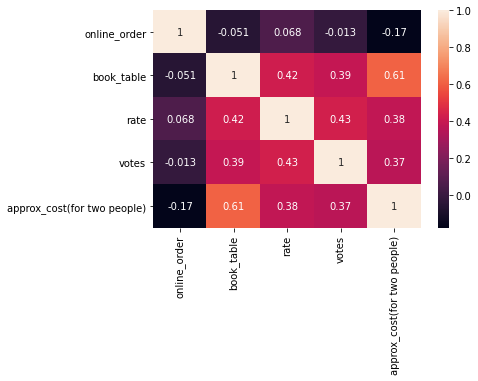

In [0]:
import seaborn as sns

corr_matrix = heatmap_df.corr()
ax = sns.heatmap(corr_matrix, annot=True)

We observe that there is a high positive correlation between Booking Table and Approximate Cost for two.  
It implies that the cost is higher where Table booking facility is provided.

###Most liked Dishes

We'll see what are the dishes do Bangaloreans like the most. Using Word cloud.

In [0]:
wordcloud_df = df.copy()
wordcloud_df.dropna(subset=['dish_liked'], inplace=True)

wordcloud_df['dish_liked'].isna().sum()
wordcloud_df['dish_liked'].describe()
wordcloud_df.tail()


address  ... listed_in(city)
51705  2nd Floor, Iona, Virginia Mall, Whitefield Mai...  ...      Whitefield
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...  ...      Whitefield
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...  ...      Whitefield
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...  ...      Whitefield
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...  ...      Whitefield

[5 rows x 14 columns]

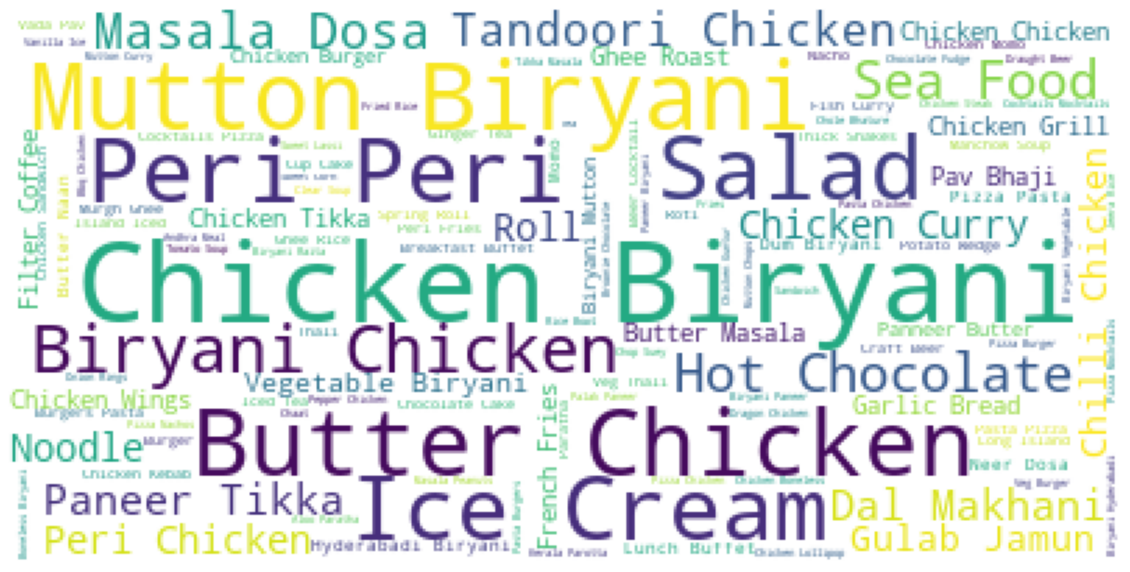

In [0]:
from wordcloud import WordCloud
from matplotlib import rcParams
import matplotlib.pyplot as plt

#all_articles = ' '.join(df_articles['stops_removed'].str.lower())

all_dishes_liked = str()
for each_entry in wordcloud_df['dish_liked']:
    all_dishes_liked = all_dishes_liked + each_entry + ' '


wordcloud = WordCloud(background_color="white", max_words=500).generate(all_dishes_liked)

rcParams['figure.figsize'] = 20, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Seems like Biryanis, Butter Chicken, Dosa, Ice Cream are some of the popular dishes among Bangaloreans.

Let's See what Cuisines are popular in Bangalore.

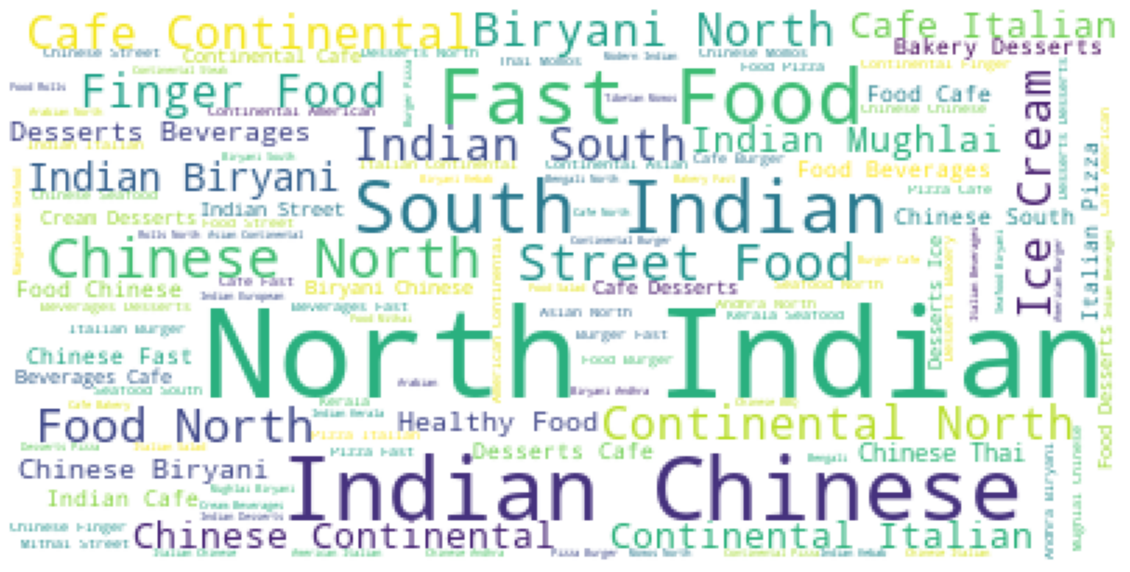

In [0]:
all_cuisines = str()
for each_entry in wordcloud_df['cuisines']:
    all_cuisines = all_cuisines + each_entry + ' '


wordcloud = WordCloud(background_color="white", max_words=500).generate(all_cuisines)

rcParams['figure.figsize'] = 20, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

North Indian Cuisines are the most popular here. Not to forget about the South Indian and Chinese food though.

## Analysing the Reviews

### Preprocessing all the reviews

In [0]:
import re

all_reviews_ratings_list = []
for name, each_review_list in zip(rests_density_df['name'], rests_density_df['reviews_list']):
    reviews_list_evaluated = eval(each_review_list)
    for rating, raw_review in reviews_list_evaluated:
        if rating:
            rating_score = rating.strip("Rated").strip()
            rating_score = float(rating_score)
            review_doc = raw_review.strip("RATED").strip()
            all_reviews_ratings_list.append([name, rating_score, review_doc])


In [0]:
# creating Dataframe from the above list of reviews and ratings

reviews_ratings_df = pd.DataFrame(all_reviews_ratings_list, columns=['Name', 'Rating', 'Review'])
#reviews_ratings_df.head(10)

reviews_ratings_df['Review'] = reviews_ratings_df['Review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]'," ",x))

reviews_ratings_df['Review'] = reviews_ratings_df['Review'].apply(lambda x : re.sub("\n"," ",x))

reviews_ratings_df['Review'] = reviews_ratings_df['Review'].apply(lambda x : x.lower())
reviews_ratings_df.head()

Name  Rating                                             Review
0  Jalsa     4.0  a beautiful place to dine in the interiors tak...
1  Jalsa     4.0  i was here for dinner with my family on a week...
2  Jalsa     2.0  its a restaurant near to banashankari bda  me ...
3  Jalsa     4.0  we went here on a weekend and one of us had th...
4  Jalsa     5.0  the best thing about the place is it          ...

###Top keywords from Reviews  
We can get even more insights by showing n-grams out of reviews.  


In [0]:
all_reviews_combined = reviews_ratings_df['Review'].str.cat().strip()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice

def generate_ngrams(text, n_range):
    word_frequencies = dict()
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(n_range, n_range))
    cv_fit = vectorizer.fit_transform(text)
    words_freq = np.asarray(cv_fit.sum(axis=0))

    for word, index in vectorizer.vocabulary_.items():
        word_frequencies[word] = words_freq[0, index]
    
    return word_frequencies;


In [0]:
all_reviews_combined = [all_reviews_combined]
word_frequencies = generate_ngrams(all_reviews_combined, 1)
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key = lambda x : x[1], reverse = True))
most_common_unigrams = dict(islice(sorted_word_frequencies.items(), 50))

word_frequencies = generate_ngrams(all_reviews_combined, 2)
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key = lambda x : x[1], reverse = True))
most_common_bigrams = dict(islice(sorted_word_frequencies.items(), 50))

word_frequencies = generate_ngrams(all_reviews_combined, 3)
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key = lambda x : x[1], reverse = True))
most_common_trigrams = dict(islice(sorted_word_frequencies.items(), 50))


In [0]:

strings_unigrams, count_unigrams = zip(*most_common_unigrams.items())
strings_unigrams = list(strings_unigrams)

strings_bigrams, count_bigrams = zip(*most_common_bigrams.items())
strings_bigrams = list(strings_bigrams)

strings_trigrams, count_trigrams = zip(*most_common_trigrams.items())
strings_trigrams = list(strings_trigrams)


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#function to plot the ngrams
def plot_ngrams(x, y, n_range):
    plt.figure(1, figsize=(12, 12))
    if n_range == 1:
        title = "Top Unigrams"
        y_label = "Unigrams"
    elif n_range == 2:
        title = "Top Bigrams"
        y_label = "Bigrams"
    elif n_range == 3:
        title = "Top Trigrams"
        y_label = "Trigrams"
    else:
        return;

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(y_label)
#    plt.barh(x, y)
    sns.barplot(x=y, y=x, palette='dark')
    plt.show()

    return;


####Unigrams

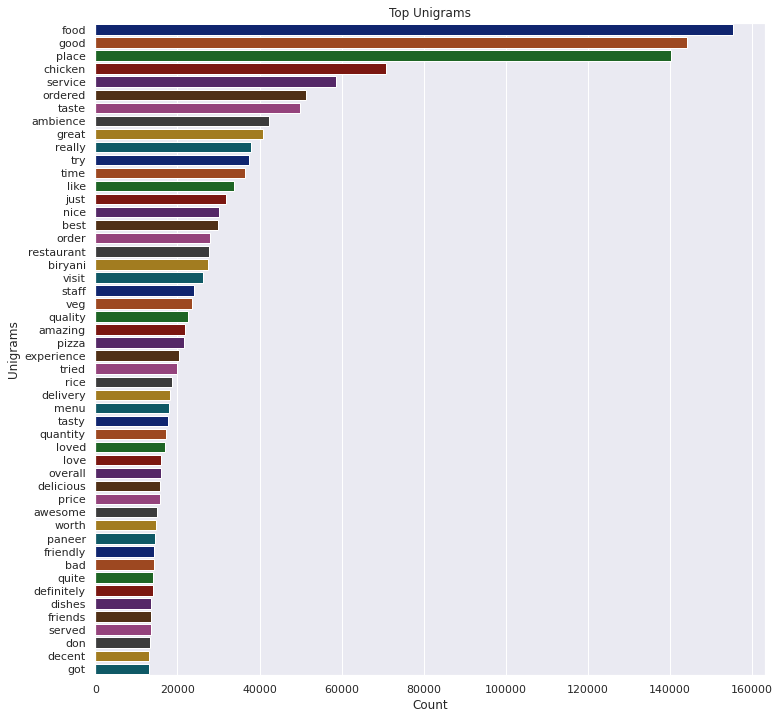

In [0]:
plot_ngrams(strings_unigrams, count_unigrams, 1)

####Bigrams

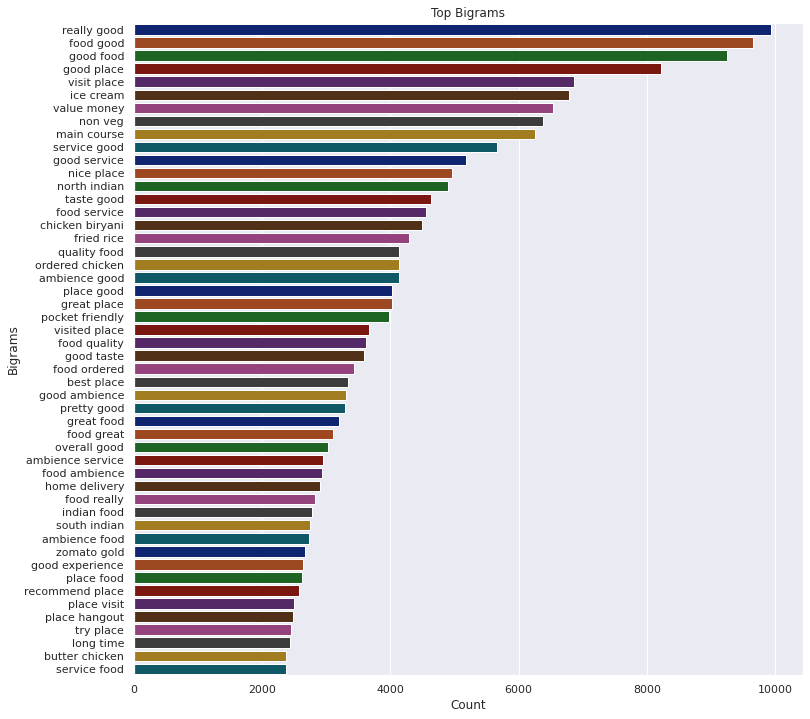

In [0]:
plot_ngrams(strings_bigrams, count_bigrams, 2)

####Trigrams

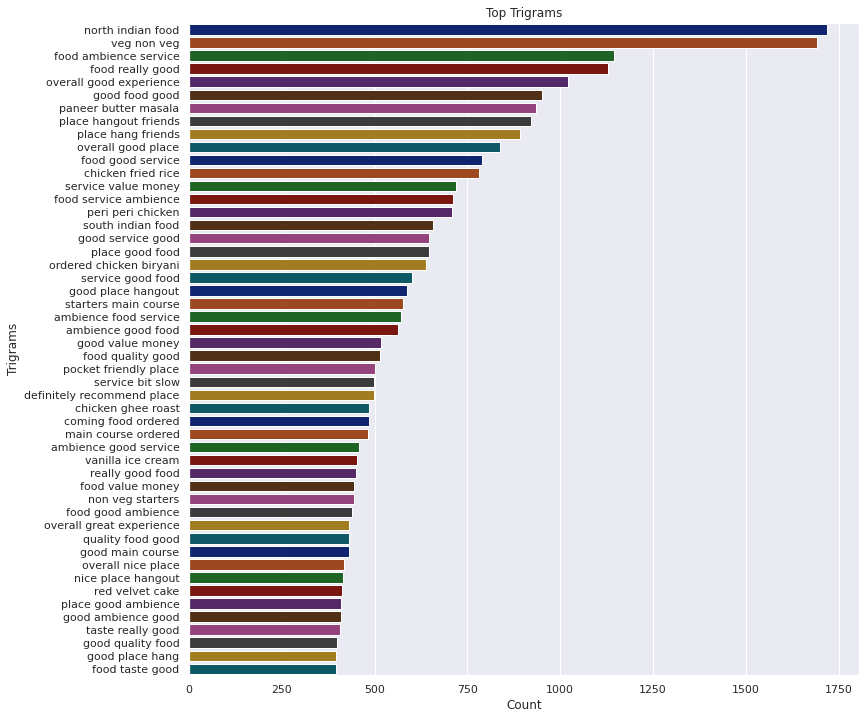

In [0]:
plot_ngrams(strings_trigrams, count_trigrams, 3)

###Sentiment analysis using Keras LSTM

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
max_review_length = 128

tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(reviews_ratings_df['Review'].values)
X = tokenizer.texts_to_sequences(reviews_ratings_df['Review'].values)

vocab_size = len(tokenizer.word_index) + 1      #'+1' added because following error was coming while testing the model on test data.
#indices[6,73] = 53002 is not in [0, 53002)
#[[node embedding_2/embedding_lookup (defined at /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_69749]

X = pad_sequences(X, maxlen = max_review_length)

In [0]:
embed_dim = 32

model = Sequential()
model.add(Embedding(vocab_size, embed_dim,input_length = max_review_length))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 128, 32)           1696096   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,720,993
Trainable params: 1,720,993
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
Y = reviews_ratings_df['labels']
#Y = to_categorical(Y, num_classes=2)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

X_train.shape

(155817, 128)

In [0]:
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min')
mc = ModelCheckpoint('/content/drive/My Drive/Zomato_Rests_Reviews_Analysis/sent_anls_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model.fit(X_train, Y_train, epochs = 20, validation_split=0.2, batch_size=batch_size, use_multiprocessing=True, verbose = 1, callbacks=[es, mc])

Train on 124653 samples, validate on 31164 samples
Epoch 1/20
124653/124653 [==============================] - 221s 2ms/step - loss: 0.1925 - accuracy: 0.9259 - val_loss: 0.1639 - val_accuracy: 0.9377
Epoch 2/20
124653/124653 [==============================] - 222s 2ms/step - loss: 0.1439 - accuracy: 0.9456 - val_loss: 0.1472 - val_accuracy: 0.9452
Epoch 3/20
124653/124653 [==============================] - 223s 2ms/step - loss: 0.1194 - accuracy: 0.9549 - val_loss: 0.1409 - val_accuracy: 0.9478
Epoch 4/20
124653/124653 [==============================] - 222s 2ms/step - loss: 0.1018 - accuracy: 0.9617 - val_loss: 0.1388 - val_accuracy: 0.9506
Epoch 5/20
124653/124653 [==============================] - 223s 2ms/step - loss: 0.0890 - accuracy: 0.9664 - val_loss: 0.1419 - val_accuracy: 0.9519


In [0]:
model = load_model('/content/drive/My Drive/Zomato_Rests_Reviews_Analysis/sent_anls_model.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
model.summary()
score = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 128, 32)           1696096   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,720,993
Trainable params: 1,720,993
Non-trainable params: 0
_________________________________________________________________
loss: 0.14%
accuracy: 95.28%


Predictions on the test set

In [0]:

y_pred = model.predict_classes(X_test, verbose=1)


76747/76747 [==============================] - 37s 481us/step


In [0]:
y_pred.shape
Y_test.shape

(76747, 1)

In [0]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.89      0.90     17539
           1       0.97      0.97      0.97     59208

    accuracy                           0.95     76747
   macro avg       0.93      0.93      0.93     76747
weighted avg       0.95      0.95      0.95     76747



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


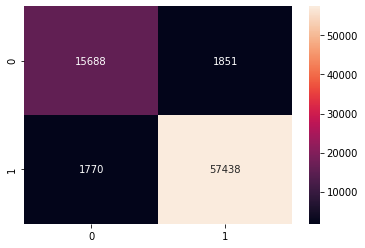

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')

## Conclusion

#### To summarize from the data:
Overall there are positive reviews in majority of the restaurants in Bengaluru.
Reviews also indicate that the bangaloreans are concerned about the food quality and many other things such as Ambience, overall experience, service etc.
A few negative reviews also indicate that Bangaloreans are pretty much critical when it comes to go out in the restaurants to hang out.

#### About the Business Problem:
We can choose to take various decisions with our restaurant owner client on possible areas such as type of restaurant, serivices provided. We can take conclusive decisions based on the restaurant owner's budget to start a new restaurant and other preferences.

Although this data does not include several other aspects for the business problem, we've got plenty of insights for our client which will be definitely useful for when they want to open a new restaurant in Bangalore.